<a href="https://colab.research.google.com/github/AmandaCruz07/Data/blob/main/Copy_of_Copy_of_Assignment1_notebook_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

#Load Data

In [ ]:
file_id = '1DPzld5smHl7pds4APVL7qMBMHPQEN_CD'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22


#Inspect data

In [ ]:
print(df.info())
print("Target variable description")
df["wage_eur"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   wage_eur                    18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_agility            18278 non-null  int64
 14  moveme

count     18278.000000
mean       9456.942773
std       21351.714095
min           0.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      565000.000000
Name: wage_eur, dtype: float64

#Drop null values

In [ ]:
df = df.dropna()

#Split test and training data

In [ ]:
target = 'wage_eur'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Function to evaluate model

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    return mse_train, mse_test, r2_train, r2_test

#Evaluate if removing outliers improves performance

In [ ]:
model = LinearRegression()

In [ ]:
# 1. Without Outlier Removal
mse_train_no_outliers, mse_test_no_outliers, r2_train_no_outliers, r2_test_no_outliers = evaluate_model(model, X_train, y_train, X_test, y_test)

# 2. With Outlier Removal using z-score method
# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(X_train))

# Set threshold for z-score
threshold = 3

# Remove rows where any feature has a z-score greater than threshold
X_train_no_outliers = X_train[(z_scores < threshold).all(axis=1)]
y_train_no_outliers = y_train[X_train.index.isin(X_train_no_outliers.index)]

# Evaluate the model with outlier removal
mse_train_outliers_removed, mse_test_outliers_removed, r2_train_outliers_removed, r2_test_outliers_removed = evaluate_model(model, X_train_no_outliers, y_train_no_outliers, X_test, y_test)

# Print the results
print("Without Outlier Removal:")
print(f'Training MSE: {mse_train_no_outliers:,.2f}')
print(f'Testing MSE: {mse_test_no_outliers:,.2f}')
print(f'Training R^2: {r2_train_no_outliers:.2f}')
print(f'Testing R^2: {r2_test_no_outliers:.2f}')

print("\nWith Outlier Removal:")
print(f'Training MSE: {mse_train_outliers_removed:,.2f}')
print(f'Testing MSE: {mse_test_outliers_removed:,.2f}')
print(f'Training R^2: {r2_train_outliers_removed:.2f}')
print(f'Testing R^2: {r2_test_outliers_removed:.2f}')

Without Outlier Removal:
Training MSE: 317,548,366.00
Testing MSE: 366,133,025.94
Training R^2: 0.29
Testing R^2: 0.27

With Outlier Removal:
Training MSE: 261,864,718.44
Testing MSE: 367,227,837.34
Training R^2: 0.31
Testing R^2: 0.26


Analysis: The removal of outliers provides improved performance according to the models fit to the data when training. However, the model was not as sucessful when encountering unseen data as indicated by the reduced performance in both testing metrics.

#Evaluate benefit of scaling

Train model without scaling

In [ ]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train_no_scaling = mean_squared_error(y_train, y_pred_train)
mse_test_no_scaling = mean_squared_error(y_test, y_pred_test)
r2_train_no_scaling = r2_score(y_train, y_pred_train)
r2_test_no_scaling = r2_score(y_test, y_pred_test)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train model with scaling

In [ ]:
model.fit(X_train_scaled, y_train)
y_pred_train_scaled = model.predict(X_train_scaled)
y_pred_test_scaled = model.predict(X_test_scaled)
mse_train_scaling = mean_squared_error(y_train, y_pred_train_scaled)
mse_test_scaling = mean_squared_error(y_test, y_pred_test_scaled)
r2_train_scaling = r2_score(y_train, y_pred_train_scaled)
r2_test_scaling = r2_score(y_test, y_pred_test_scaled)

Print results

In [ ]:
print("Without Scaling:")
print(f'Training MSE: {mse_train_no_scaling}')
print(f'Testing MSE: {mse_test_no_scaling}')
print(f'Training R^2: {r2_train_no_scaling}')
print(f'Testing R^2: {r2_test_no_scaling}')

print("\nWith Scaling:")
print(f'Training MSE: {mse_train_scaling}')
print(f'Testing MSE: {mse_test_scaling}')
print(f'Training R^2: {r2_train_scaling}')
print(f'Testing R^2: {r2_test_scaling}')

Without Scaling:
Training MSE: 317548365.9968781
Testing MSE: 366133025.9415515
Training R^2: 0.2864691944127301
Testing R^2: 0.26655371158502883

With Scaling:
Training MSE: 317548365.9968781
Testing MSE: 366133025.9415515
Training R^2: 0.2864691944127301
Testing R^2: 0.26655371158502883


Analysis: The results do not vary with or without scaling.

#Try different test sizes for linear regression model

In [ ]:
# Function to train and evaluate the model
def evaluate_model(X, y, test_size):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Print results
    print(f"Test Size: {test_size*100}%")
    print(f"Training MSE: {mse_train:,.2f}")
    print(f"Testing MSE: {mse_test:,.2f}")
    print(f"Training R^2: {r2_train:.2f}")
    print(f"Testing R^2: {r2_test:.2f}")
    print("-" * 30)

# List of test sizes to compare
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Compare different test sizes
for test_size in test_sizes:
    evaluate_model(X, y, test_size)

Test Size: 10.0%
Training MSE: 334,017,345.33
Testing MSE: 266,528,639.99
Training R^2: 0.28
Testing R^2: 0.28
------------------------------
Test Size: 20.0%
Training MSE: 317,548,366.00
Testing MSE: 366,133,025.94
Training R^2: 0.29
Testing R^2: 0.27
------------------------------
Test Size: 30.0%
Training MSE: 307,152,069.14
Testing MSE: 375,019,232.15
Training R^2: 0.29
Testing R^2: 0.27
------------------------------
Test Size: 40.0%
Training MSE: 310,147,393.32
Testing MSE: 353,908,749.40
Training R^2: 0.29
Testing R^2: 0.27
------------------------------


Analysis: 10% test size did not do well with the training data, but performed well with the testing data. This result indicates that model was adaptable with new data after having more data input.

#Compare KNN and Linear regression models

In [ ]:
# Function to train and evaluate models
def evaluate_models(X, y, test_size=0.2):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize models
    lr_model = LinearRegression()
    knn_model = KNeighborsRegressor(n_neighbors=5)

    # Train models
    lr_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred_lr = lr_model.predict(X_train)
    y_test_pred_lr = lr_model.predict(X_test)
    y_train_pred_knn = knn_model.predict(X_train)
    y_test_pred_knn = knn_model.predict(X_test)

    # Calculate metrics
    mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
    mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
    r2_train_lr = r2_score(y_train, y_train_pred_lr)
    r2_test_lr = r2_score(y_test, y_test_pred_lr)

    mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
    mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)
    r2_train_knn = r2_score(y_train, y_train_pred_knn)
    r2_test_knn = r2_score(y_test, y_test_pred_knn)

    # Print results
    print("Linear Regression:")
    print(f"Training MSE: {mse_train_lr:,.2f}")
    print(f"Testing MSE: {mse_test_lr:,.2f}")
    print(f"Training R^2: {r2_train_lr:.2f}")
    print(f"Testing R^2: {r2_test_lr:.2f}")
    print("-" * 30)

    print("K-Nearest Neighbors Regression:")
    print(f"Training MSE: {mse_train_knn:,.2f}")
    print(f"Testing MSE: {mse_test_knn:,.2f}")
    print(f"Training R^2: {r2_train_knn:.2f}")
    print(f"Testing R^2: {r2_test_knn:.2f}")
    print("-" * 30)

# Evaluate models with a 20% test size
evaluate_models(X, y, test_size=0.2)

Linear Regression:
Training MSE: 317,548,366.00
Testing MSE: 366,133,025.94
Training R^2: 0.29
Testing R^2: 0.27
------------------------------
K-Nearest Neighbors Regression:
Training MSE: 115,887,878.54
Testing MSE: 202,514,485.78
Training R^2: 0.74
Testing R^2: 0.59
------------------------------


Analysis: The KNN regression model shows significantly improved training and testing results. KNN regression has better MSE results meaning it fits the data better, as well as better R2 results meaning it can better understand the variance in the data.

#compare different k values

In [ ]:
# Function to evaluate KNN with different k values
def evaluate_knn(X_train, X_test, y_train, y_test, k_values):
    for k in k_values:
        # Initialize and train the KNN model
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(X_train, y_train)

        # Predict on training and testing data
        y_train_pred = knn_model.predict(X_train)
        y_test_pred = knn_model.predict(X_test)

        # Calculate metrics
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Print results
        print(f"KNN Regression with k={k}:")
        print(f"Training MSE: {mse_train:,.2f}")
        print(f"Testing MSE: {mse_test:,.2f}")
        print(f"Training R^2: {r2_train:.2f}")
        print(f"Testing R^2: {r2_test:.2f}")
        print("-" * 30)

# Evaluate KNN models with k values of 3, 5, and 7
k_values = [3, 5, 7]
evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, k_values)

KNN Regression with k=3:
Training MSE: 87,667,289.78
Testing MSE: 209,459,852.91
Training R^2: 0.80
Testing R^2: 0.58
------------------------------
KNN Regression with k=5:
Training MSE: 114,645,255.10
Testing MSE: 203,558,249.45
Training R^2: 0.74
Testing R^2: 0.59
------------------------------
KNN Regression with k=7:
Training MSE: 129,703,932.29
Testing MSE: 198,587,203.59
Training R^2: 0.71
Testing R^2: 0.60
------------------------------


Analysis: k=7 has the lowest testing MSE and highest testing R2 which means it has the best results when it comes to predicting new values. However, it has the worst MSE and R2 when it comes to the training data, meaning it may be less reliable.

#Linear regression visualization

count     18278.000000
mean       9456.942773
std       21351.714095
min           0.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      565000.000000
Name: wage_eur, dtype: float64
Intercept: -65832.1278345205
Coefficients: [ 4.71766696e+00  2.91890795e+01 -2.27945238e+00  8.77340463e+01
  1.05803674e+02 -7.41697907e+00  4.30039379e+01 -6.01774988e+01
  3.89880263e-01  8.57907653e+01  2.96787047e+01  8.16295928e+01
 -1.08633148e+02  9.11546573e+02 -4.38715211e+01  1.42645343e+02
  4.99177221e+01 -9.74817416e+01 -4.81190854e+01 -1.85933278e+02
 -5.65737777e+01 -3.65258118e+01 -9.54755012e+01  1.40205421e+02
 -1.60598772e+01  2.17359914e+02 -1.17325941e+01  9.86824291e+01
 -2.76362527e+01]


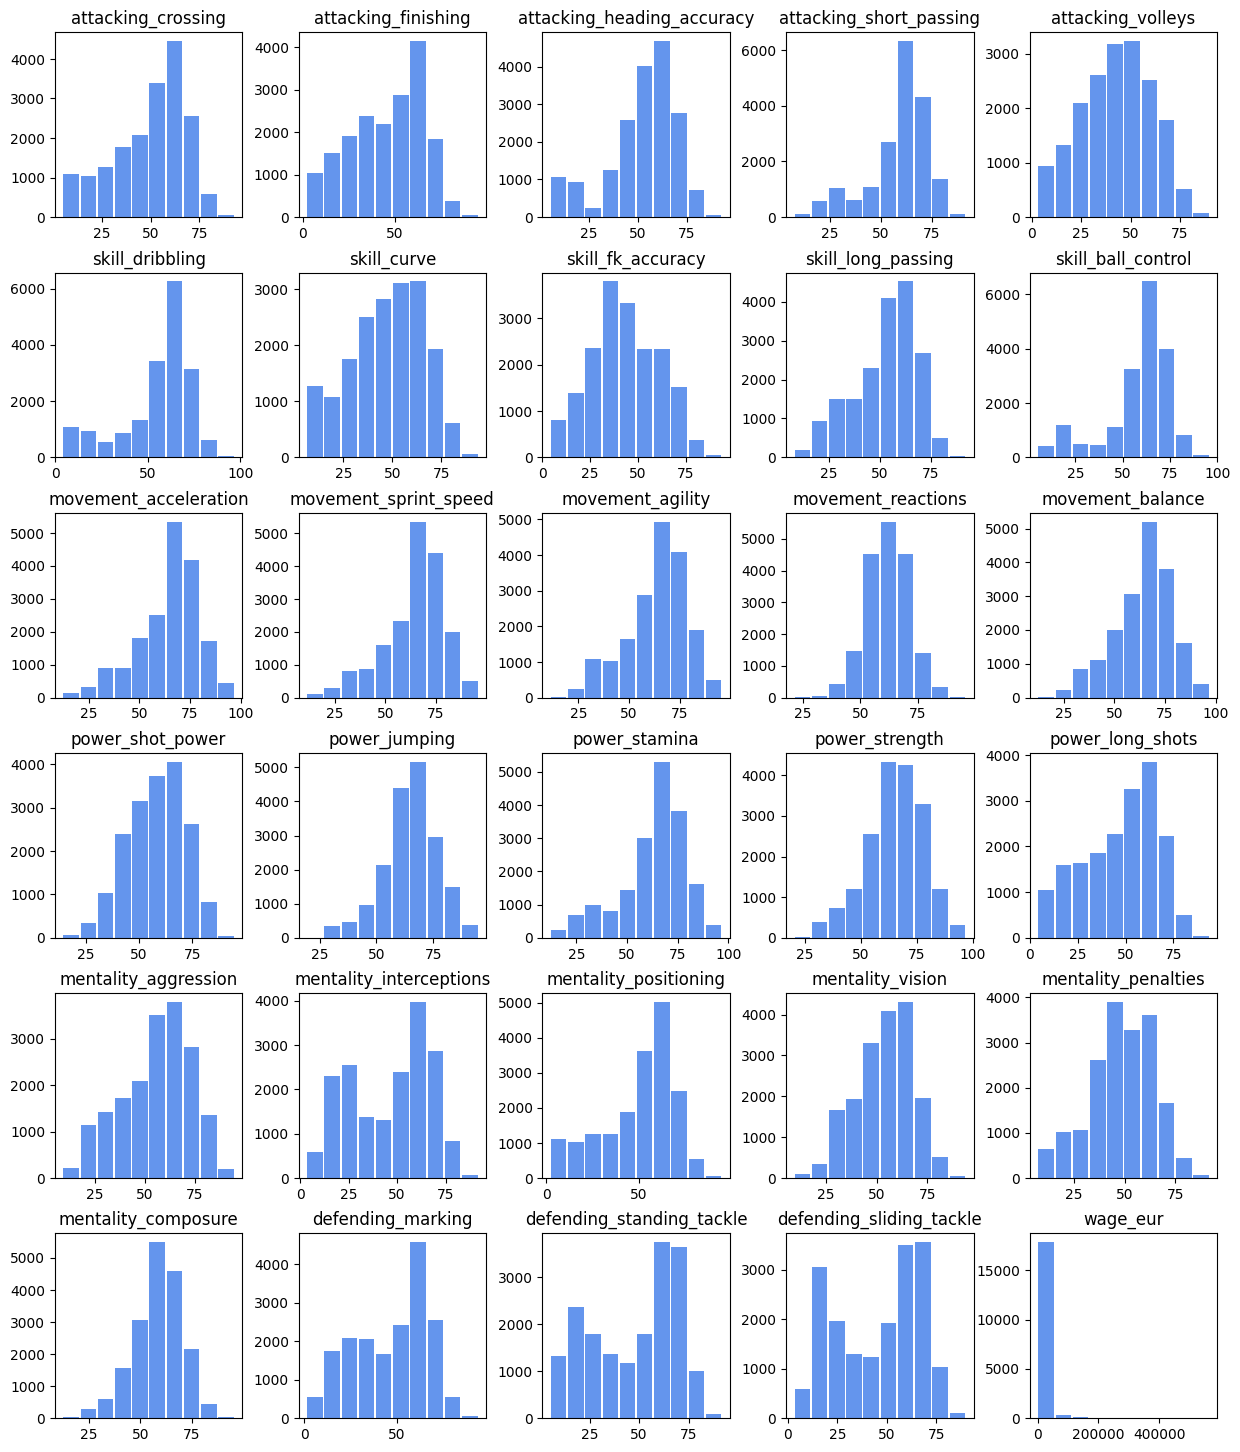

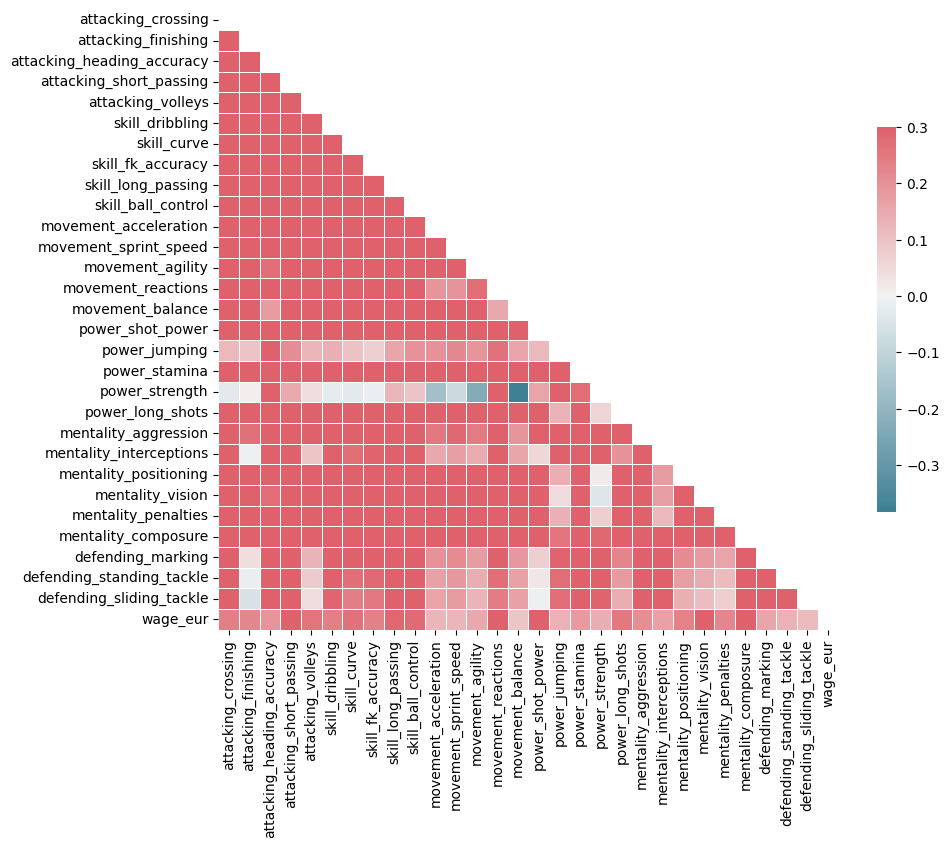

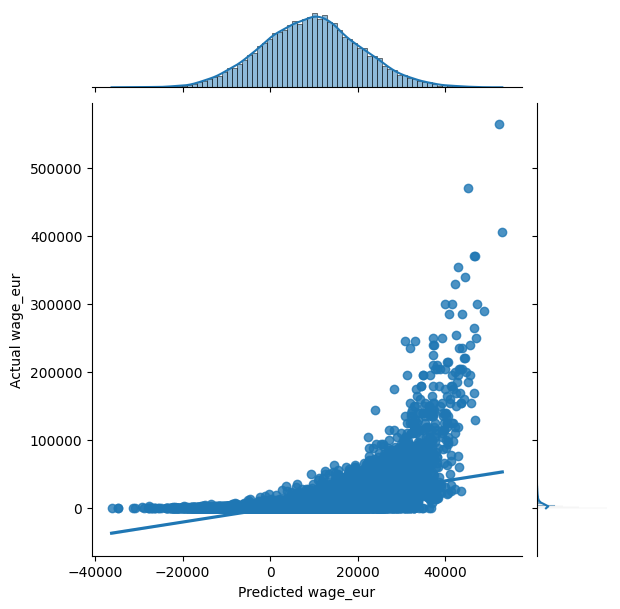

In [ ]:
# show statistics and visualize data
print(df['wage_eur'].describe())
'Histogram '

df[['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle','wage_eur']].hist(grid = False, figsize = (15,18), layout = (6, 5), color = 'cornflowerblue', zorder = 2, rwidth = 0.9);

# dropping null values
df.dropna(inplace=True)

# show correlation
df_corr= df[['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle','wage_eur']].corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});
# data preparation
target = 'wage_eur'
attributes = [col for col in df.columns if col != target]
X = df[attributes]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

intercept = regressor.intercept_
coefficient = regressor.coef_
print('Intercept:', intercept)
print('Coefficients:', coefficient)

predicted_value = regressor.predict(X)
predicted_value

# visualize predicted values

sns.jointplot(x = predicted_value, y = df['wage_eur'], kind = 'reg')

plt.xlabel('Predicted wage_eur')
plt.ylabel('Actual wage_eur')

plt.show()

Analysis: As per the graph above, the predicted liner regression wage_eur has shown as an anticipated increase. The actual wage_eur follows this trend with a significant increase surpassing its predicted value.

#Assignment Questions

**Explanations of process**

•	Import libraries

•	Load data, inspect and preprocess – Inspect data to get a sense of its shape and makeup. Preprocessing consisted of ensuring no null values and removing outliers, scaling was tested but this made no difference to the results.

•	Split data into training and testing sets.

•	Compare different regression models.

•	Evaluate results using MSE and R2.

**What metric/value/quality did you use to evaluate your model? Why did you choose this?**

We used MSE and R2 as they are easily attainable, interpretable, and comparable.

**What did you do to improve your model? Why did you choose this? Was there a notable improvement?**

To improve our model, we tested multiple different sizes for linear regression and k values for KNN regression. By testing multiple values, we were able to identify which values offered the best data to better understand the nature of our model. There was a notable improvement in terms of interpretation.

**What did you do to prepare the data prior to modelling? Why?**

First, we inspected the data to get an idea of how it was structured and then tried scaling, which brought the datapoints into a common scale. However, doing this had no significant changes in result.

Next, we tried removing outliers that could affect the models by excluding datapoints that were too large or small which could indicate they were less “in tune” with the metrics in our dataset. However, this did not end up improving our test results, indicating the models performed better when they had access to these outlying datapoints.


**Sources:**

Used Chatgpt with the following prompts

"My dataframe has many columns and they have long names is
their a faster way you put all of them except my target variable into the "features" area?"

"How can I evaluate whether scaling has improved results"

"after scaling the data when I want to perform linear regression on it do I need to use a different variable instead of X_train?"

"How do I reduce outliers in my dataframe and print the results"

"How can I compare the effectiveness of linear regression and KNN models?"

"How do I compare different test sizes for Linear regression?"

"How do I compare different k values for KNN?"


